# N차원 배열

## 복사와 뷰

In [2]:
a = np.arange(12)
a.shape, type(a), a.ndim

((12,), numpy.ndarray, 1)

In [13]:
b = a #둘은 같은 배열 객체이지만 이름만 다름, 같은 곳을 가르킴 (복사 안됨)

In [5]:
b is a

True

In [6]:
b.shape, type(b), b.ndim

((12,), numpy.ndarray, 1)

In [7]:
b.shape=(3,4)

In [11]:
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [10]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [9]:
id(a), id(b)

(1760433653120, 1760433653120)

In [12]:
def f(data):
    print(id(data))

### 얕은 복사(view)

In [15]:
c = a.view()
c is a

False

In [16]:
c.flags.owndata#c가 메모리를 직접 소유하지 않음

False

In [17]:
a.flags.owndata

True

In [18]:
c.shape = (2,6)

In [19]:
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [20]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [21]:
c[:,2] = 999

In [22]:
c

array([[  0,   1, 999,   3,   4,   5],
       [  6,   7, 999,   9,  10,  11]])

In [24]:
a #shape은 공유, 같은 메모리 사용

array([[  0,   1, 999,   3],
       [  4,   5,   6,   7],
       [999,   9,  10,  11]])

In [26]:
a = np.arange(12).reshape(3,4)
s = a[:, 1:3] #슬라이싱 시 뷰 반환
print(a)
print(s)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 1  2]
 [ 5  6]
 [ 9 10]]


### 깊은 복사(copy)

In [37]:
a = np.arange(12).reshape(3,4)
d = a.copy()
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [38]:
d

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [39]:
d is a #깊은 복사, 메모리 공유하지 않음, 직접 소유

False

In [40]:
d.flags.owndata

True

In [41]:
d.shape = (2,6)

In [42]:
d

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [43]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [44]:
d[0,2] = 9999
d

array([[   0,    1, 9999,    3,    4,    5],
       [   6,    7,    8,    9,   10,   11]])

In [45]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

## 고급 인덱싱

### 인덱스 배열로 인덱싱

In [47]:
a = np.arange(12)**2
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121],
      dtype=int32)

In [48]:
i = np.array([1,1,3,8,5])
a[i]

array([ 1,  1,  9, 64, 25], dtype=int32)

In [50]:
j = np.array([[3,4], [9,7]])
a[j]

array([[ 9, 16],
       [81, 49]], dtype=int32)

In [53]:
b = np.arange(24).reshape(4,6)
b

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [57]:
#인덱스의 단일 배열은 첫번째 차원 참조

In [66]:
palette = np.array([[0,0,0], #black
                     [255,0,0],#red
                     [0,255,0],#green
                     [0,0,255],#blue
                     [255,255,0]])#white
palette

array([[  0,   0,   0],
       [255,   0,   0],
       [  0, 255,   0],
       [  0,   0, 255],
       [255, 255,   0]])

In [77]:
image_idx = np.array([[3,3,3,0,0,0,0,3,3,3],
                     [3,0,0,4,4,4,4,0,0,3],
                     [0,0,4,4,4,4,4,4,0,0],
                     [0,4,4,0,4,4,0,4,4,0],
                     [0,4,4,4,4,4,4,4,4,0],
                     [0,4,0,4,4,4,4,0,4,0],
                     [0,4,4,0,4,4,0,4,4,0],
                     [3,0,4,4,0,0,4,4,0,3],
                     [3,3,0,4,4,4,4,0,3,3],
                     [3,3,3,0,0,0,0,3,3,3]])

In [78]:
image_data = palette[image_idx]

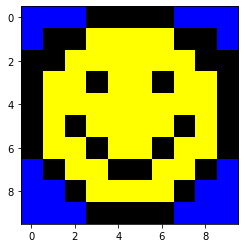

In [79]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(image_data, interpolation='nearest')
plt.show()

In [80]:
#tensorflow

In [7]:
import tensorflow.keras.datasets.mnist as mnist

In [8]:
mnist = mnist.load_data()
mnist[0][0].shape

(60000, 28, 28)

In [9]:
mnist_data = mnist[0][0]
mnist_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

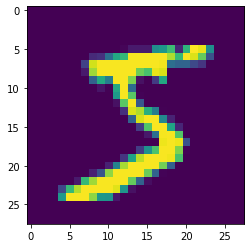

In [11]:
import matplotlib.pyplot as plt
plt.imshow(mnist_data[0])

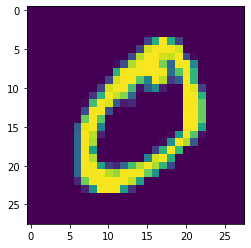

In [12]:
plt.imshow(mnist_data[1])

### 다차원 인덱싱

In [13]:
import numpy as np
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [15]:
i = np.array([[0,1], [1,2]])
j = np.array([[2,1], [3,3]])
print(i)
print(j)

[[0 1]
 [1 2]]
[[2 1]
 [3 3]]


In [16]:
a[i,j]

array([[ 2,  5],
       [ 7, 11]])

In [17]:
a[i]

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]])

In [19]:
np.all(a[i,]==a[i,...]) #모든 요소의 논리 여부

True

### argmax
- 최대값이 있는 인덱스 반환

In [20]:
data = np.sin(np.arange(20)).reshape(5,4)
data

array([[ 0.        ,  0.84147098,  0.90929743,  0.14112001],
       [-0.7568025 , -0.95892427, -0.2794155 ,  0.6569866 ],
       [ 0.98935825,  0.41211849, -0.54402111, -0.99999021],
       [-0.53657292,  0.42016704,  0.99060736,  0.65028784],
       [-0.28790332, -0.96139749, -0.75098725,  0.14987721]])

In [23]:
ind = data.argmax(axis=0) #각 열에서 큰 값이 있는 인덱스
ind

array([2, 0, 3, 1], dtype=int64)

In [29]:
data_max_col = data[ind, range(data.shape[1])] 
data_max_col

array([0.98935825, 0.84147098, 0.99060736, 0.6569866 ])

In [30]:
ind = data.argmax(axis=1) #각 행에서 큰 값이 있는 인덱스
ind

array([2, 3, 0, 2, 3], dtype=int64)

In [31]:
data_max_row = data[range(data.shape[0]), ind]
data_max_row

array([0.90929743, 0.6569866 , 0.98935825, 0.99060736, 0.14987721])

### 인덱싱을 이용한 값 변경

In [32]:
 a = np.arange(5)

In [33]:
a[[1,3,4]] = 0
a

array([0, 0, 2, 0, 0])

In [34]:
a = np.arange(5)
a[[0,0,2]] = [99,999,9999]
a

array([ 999,    1, 9999,    3,    4])

In [36]:
a = np.arange(5)
a[[0,0,2]] += 1 #중복시 최종 인덱스만 실행
a

array([1, 1, 3, 3, 4])

### 논리 배열을 이용한 인덱싱

In [38]:
a = np.arange(20).reshape(4,5)

In [39]:
a%2==0

array([[ True, False,  True, False,  True],
       [False,  True, False,  True, False],
       [ True, False,  True, False,  True],
       [False,  True, False,  True, False]])

In [40]:
a[a%2==0]

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [41]:
a[a%2==0] = a[a%2==0]**2
a

array([[  0,   1,   4,   3,  16],
       [  5,  36,   7,  64,   9],
       [100,  11, 144,  13, 196],
       [ 15, 256,  17, 324,  19]])

### ix_()
-N개의 1차원 시퀀스 배열을 입력받아 N차원 n개를 출력

In [43]:
a = np.array([1,2,3,4])
b = np.array([11,12,13])
ax, bx = np.ix_(a,b)

In [44]:
print(ax)
print(bx)

[[1]
 [2]
 [3]
 [4]]
[[11 12 13]]


In [45]:
print(ax.shape)
print(bx.shape)

(4, 1)
(1, 3)


In [46]:
ax+bx

array([[12, 13, 14],
       [13, 14, 15],
       [14, 15, 16],
       [15, 16, 17]])

## 선형대수학
- 2차원 넘파이 배열을 행렬
    - 행렬곱: @, dot()
    - 역행렬: np.linalg.inv()
    - 전치행렬: T, tanspose()
    - 단위행렬: np.eye()
    - 대각합: np.trace()
    - 연립방정식 해 풀기: np.linalg.solve()

### 선형 연립 방정식 풀이 (회귀식 도출)
- 독립변수 2개, 데이터 2개

In [47]:
a = np.array([[1,2], [3,4]])
y = np.array([[5],[7]])

In [49]:
np.linalg.inv(a) @ a

array([[1.0000000e+00, 4.4408921e-16],
       [0.0000000e+00, 1.0000000e+00]])

In [50]:
a @ np.linalg.inv(a)

array([[1.00000000e+00, 1.11022302e-16],
       [0.00000000e+00, 1.00000000e+00]])

In [48]:
#a @ x = y
#a의 역행렬 @ a @ x = a의 역행렬 @ y

In [52]:
X = np.linalg.inv(a) @ y
X # -3*x + 4*y

array([[-3.],
       [ 4.]])

### 선형 연립 방정식 풀이
- 독립변수 1개

In [55]:
x = [2,3]
y = [6.8, 7.3]
A = np.column_stack((np.array(x), np.ones(len(x))))
# 2 1
# 3 1
A #독립 변수

array([[2., 1.],
       [3., 1.]])

In [57]:
Y = np.array(y).reshape(2,1)

In [60]:
X = np.linalg.inv(A) @ Y
X #0.5*x + 5.8

array([[0.5],
       [5.8]])

In [61]:
np.linalg.solve(A,Y)

array([[0.5],
       [5.8]])

In [64]:
f = A[:,0]*X[0] + X[1] #도출된 회귀식
f

array([6.8, 7.3])

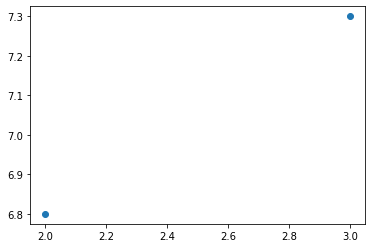

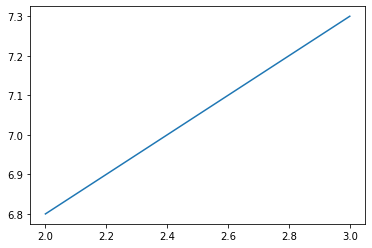

In [66]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()
plt.plot(A[:,0],f, '-')

In [67]:
x = [32,67,96,118,216,114,152,158]#독립변수
y = [18,24,61.5,49,52,105,130,125]#종속변수

In [69]:
A = np.column_stack((x, np.ones(len(x))))
B = np.array(y).reshape(len(y),1)

In [71]:
#A의 역행렬 @ A@ x = A의 역행렬 @ B
#> 역행렬 구할 수 없으므로 전방행렬 만듦
#(A.T @ A)-1 * A.T @ A @ X = (A.T @ A)-1 * A.T @ B

In [74]:
X = np.linalg.inv(A.T @ A) @ A.T @ B
X

array([[ 0.40863083],
       [21.88435235]])

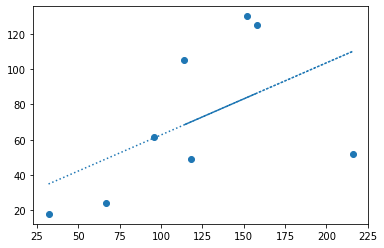

In [79]:
%matplotlib inline
plt.scatter(x,y)
plt.plot(A[:,0], A[:,0]*X[0]+X[1], ':')

## tip

In [80]:
mu, sigma = 2, 0.5
v = np.random.normal(mu, sigma, 10000)

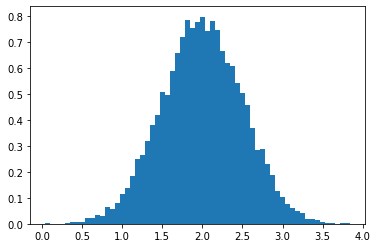

In [81]:
(n, bins) = np.histogram(v, bins=50, density=True)
plt.hist(v, bins="auto", density=1)
plt.show()

## 연습문제

In [87]:
import numpy as np 
from sklearn import datasets
iris = datasets.load_iris()
iris_data = iris.data
iris_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [107]:
iris_data.mean(axis=0)

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [108]:
ex2 = iris_data[:5,...]
ex2

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [110]:
ex3 = iris_data[:5,:-1]
ex3

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4]])

In [98]:
ex4 = iris_data[0:5, -1].reshape(len(ex2),1)
ex4

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2]])

In [102]:
ex2 == np.hstack((ex3,ex4))

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [105]:
ex2[ex2>ex2.mean(axis=0)]

array([5.1, 3.5, 4.9, 1.5, 5. , 3.6])